In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

URA_Data = pd.read_csv('Vacant site by URA - additional details.csv')
URA_Data

,date_of_launch,date_of_tender_closing,tender_period (no. of days),date_of_award,location,type_of_devt_allowed,lease,type_of_devt_code,site_area,gross_plot_ratio,gross_floor_area,no_of_bids,successful_tenderer_name,successful_tender_price,psm_per_gpr_or_gfa,planning_area,type_of_region
0,4/28/2016,6/28/2016,61,7/1/2016,Martin Place,Residential,99,Residential (Non-Landed),"15,936.10",na,"44,622",13,First Bedok Land Pte Ltd,"595,100,000","13,336.47",River Valley,Core Central Region (CCR)
1,3/30/2016,5/24/2016,55,5/30/2016,Bukit Batok West Avenue 6,Commercial and Residential,99,Commercial and Residential,"14,696.70",na,"44,091",11,Qingjian Realty (BBR) Pte Ltd. and Qingjian Re...,"301,160,000","6,830.42",Bukit Batok,Outside Core Central Region (OCR)
2,2/25/2016,4/7/2016,42,4/13/2016,Jalan Kandis,Residential,99,Residential (Non-Landed),"7,045.60",na,"9,864",9,Dillenia Land Pte.Ltd.,"51,070,228","5,177.44",Sembawang,Outside Core Central Region (OCR)
3,1/20/2016,2/23/2016,34,2/26/2016,New Upper Changi Road / Bedok South Avenue 3,Residential,99,Residential (Non-Landed),"24,394.00",na,"51,228",8,CEL Residential Development Pte. Ltd.,"419,380,000","8,186.54",Bedok,Outside Core Central Region (OCR)
4,11/26/2015,1/14/2016,49,1/18/2016,Siglap Road,Residential,99,Residential (Non-Landed),"19,309.60",na,"67,584",8,"FCL Topaz Pte. Ltd., Sekisui House, Ltd. and K...","624,180,000","9,235.62",Bedok,Outside Core Central Region (OCR)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,10/19/1992,2/9/1993,113,5/21/1993,Kaki Bukit,Light industry,60,Industrial,"60,000.00",2,na,2,Technology Parks Pte Ltd,"44,880,000",374,Bedok,Outside Core Central Region (OCR)
336,10/19/1992,2/9/1993,113,5/21/1993,Tuas South Avenue 3 / Tuas South Avenue 4,General or Light industry,60,Industrial,"102,264.00",1,na,1,Technology Parks Pte Ltd,"24,338,800",238,Tuas,Outside Core Central Region (OCR)
337,10/19/1992,2/9/1993,113,5/21/1993,Tuas South Avenue 4 / Tuas South Avenue 5,General or Light industry,60,Industrial,"102,264.00",1,na,1,Technology Parks Pte Ltd,"24,032,000",235,Tuas,Outside Core Central Region (OCR)
338,8/31/1992,11/24/1992,85,2/15/1993,Merchant Road / Angus Street,Restoration and adaptive reuse of existing bui...,99,Hotel,"2,609.00",na,"6,167",2,Food Alley Pte Ltd,"6,890,000","1,117.24",Singapore River,Core Central Region (CCR)


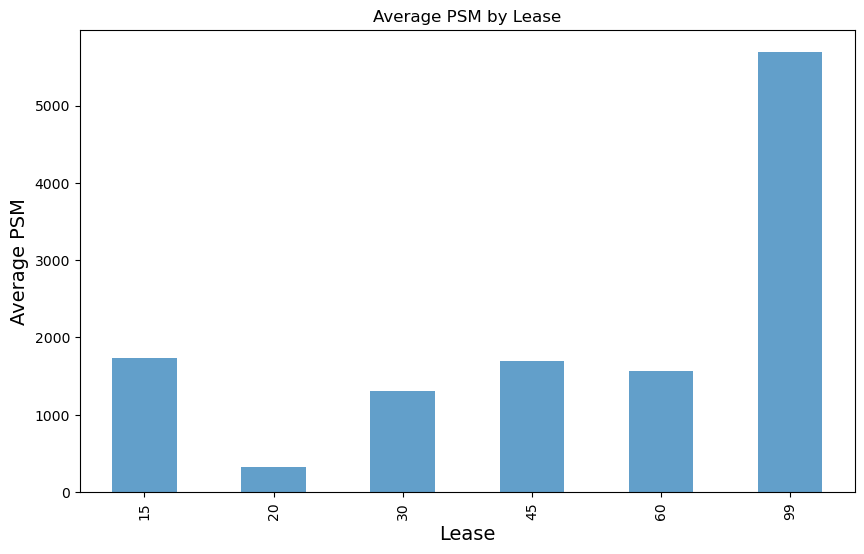

In [5]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

URA_Data = pd.read_csv('Vacant site by URA - additional details.csv')

def clean_and_convert_price(price):
    if isinstance(price, str):
        # Using regular expression to remove commas and other non-numeric characters
        price = re.sub(r'[^\d.]', '', price)
    try:
        return float(price)
    except ValueError:
        return None

URA_Data["psm_per_gpr_or_gfa"] = URA_Data["psm_per_gpr_or_gfa"].apply(clean_and_convert_price)
    
# Convert 'psm_per_gpr_or_gfa' to float
URA_Data['psm_per_gpr_or_gfa'] = URA_Data['psm_per_gpr_or_gfa'].astype(float)

average_psm = URA_Data.groupby('lease')['psm_per_gpr_or_gfa'].mean()

plt.figure(figsize=(10, 6))
average_psm.plot(kind='bar', alpha=0.7)

plt.title('Average PSM by Lease')
plt.xlabel('Lease', fontsize=14)
plt.ylabel('Average PSM', fontsize=14)

plt.show()

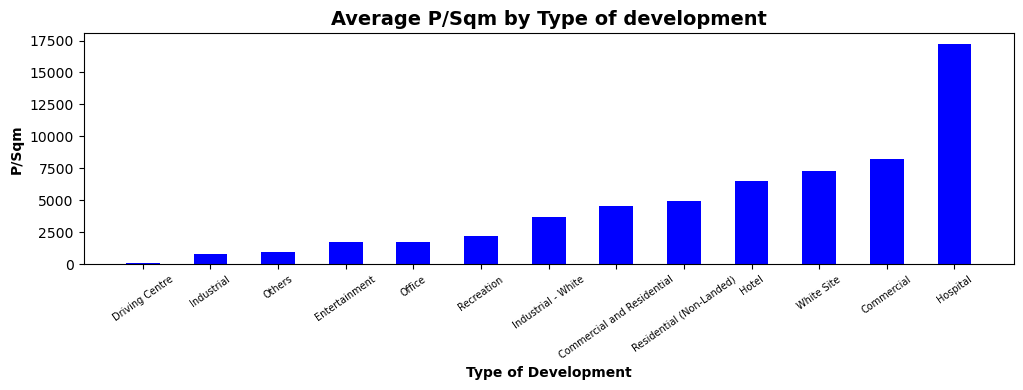

In [80]:
import re

def clean_and_convert_price(price):
    if isinstance(price, str):
        # Using regular expression to remove commas and other non-numeric characters
        price = re.sub(r'[^\d.]', '', price)
    try:
        return float(price)
    except ValueError:
        return None
    
URA_Data["psm_per_gpr_or_gfa"] = URA_Data["psm_per_gpr_or_gfa"].apply(clean_and_convert_price)
    
average_prices = URA_Data.groupby("type_of_devt_code")["psm_per_gpr_or_gfa"].mean().reset_index()

average_prices = average_prices.sort_values(by="psm_per_gpr_or_gfa")

plt.figure(figsize=(12, 3))
plt.title('Average P/Sqm by Type of development', fontsize=14, fontweight="bold")
plt.bar(average_prices["type_of_devt_code"], average_prices["psm_per_gpr_or_gfa"], color='blue', width=0.5)
plt.xlabel('Type of Development', fontweight="bold")
plt.ylabel('P/Sqm', fontweight="bold")
plt.xticks(rotation=35, fontsize=7)


plt.show()

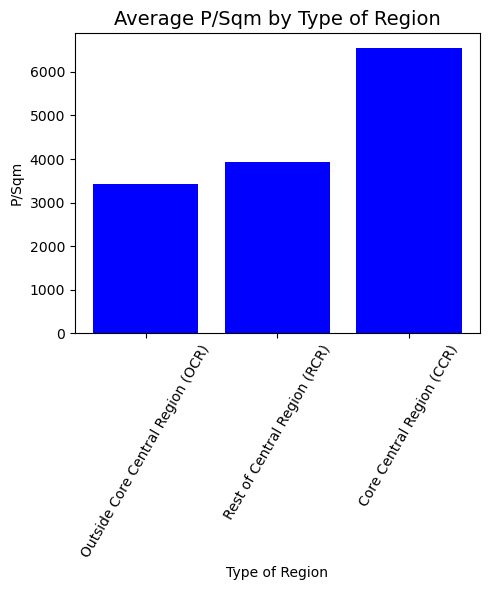

In [14]:
import re

def clean_and_convert_price(price):
    if isinstance(price, str):
        # Using regular expression to remove commas and other non-numeric characters
        price = re.sub(r'[^\d.]', '', price)
    try:
        return float(price)
    except ValueError:
        return None
    
URA_Data["psm_per_gpr_or_gfa"] = URA_Data["psm_per_gpr_or_gfa"].apply(clean_and_convert_price)
    
average_prices = URA_Data.groupby("type_of_region")["psm_per_gpr_or_gfa"].mean().reset_index()

average_prices = average_prices.sort_values(by="psm_per_gpr_or_gfa")

plt.figure(figsize=(5, 6))
plt.title('Average P/Sqm by Type of Region', fontsize=14)
plt.bar(average_prices["type_of_region"], average_prices["psm_per_gpr_or_gfa"], color='blue')
plt.xlabel('Type of Region')
plt.ylabel('P/Sqm')
plt.xticks(rotation=60, fontsize=10)

plt.tight_layout()

plt.show()

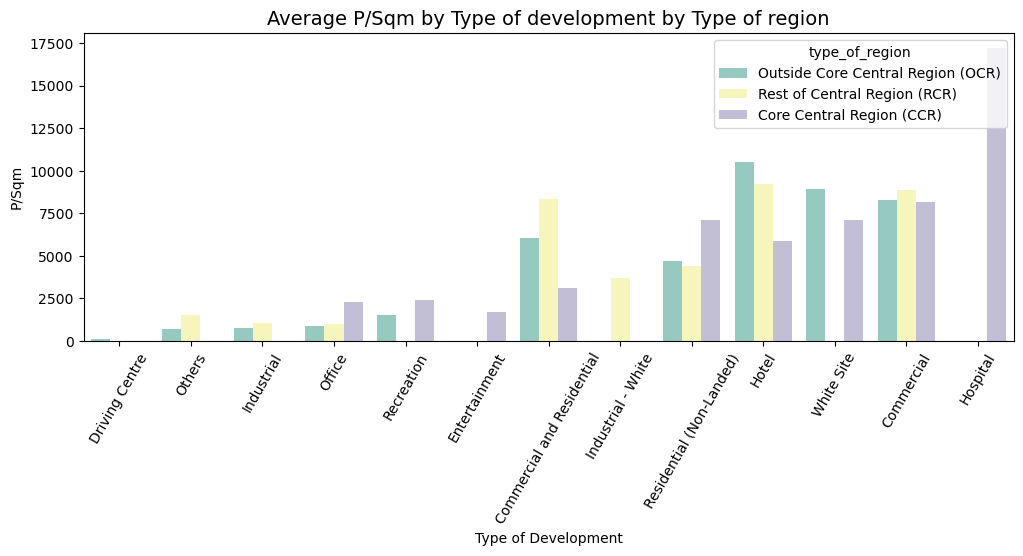

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

URA_Data = pd.read_csv('Vacant site by URA - additional details.csv')
URA_Data

import re

def clean_and_convert_price(price):
    if isinstance(price, str):
        # Using regular expression to remove commas and other non-numeric characters
        price = re.sub(r'[^\d.]', '', price)
    try:
        return float(price)
    except ValueError:
        return None
    
URA_Data["psm_per_gpr_or_gfa"] = URA_Data["psm_per_gpr_or_gfa"].apply(clean_and_convert_price)
    
average_prices = URA_Data.groupby(["type_of_devt_code", "type_of_region"])["psm_per_gpr_or_gfa"].mean().reset_index()

average_prices = average_prices.sort_values(by="psm_per_gpr_or_gfa")

plt.figure(figsize=(12, 4))
sns.barplot(data=average_prices, x="type_of_devt_code", y="psm_per_gpr_or_gfa", hue="type_of_region", palette="Set3")
plt.title('Average P/Sqm by Type of development by Type of region', fontsize=14)
plt.xlabel('Type of Development')
plt.ylabel('P/Sqm')
plt.xticks(rotation=60, fontsize=10)


plt.show()

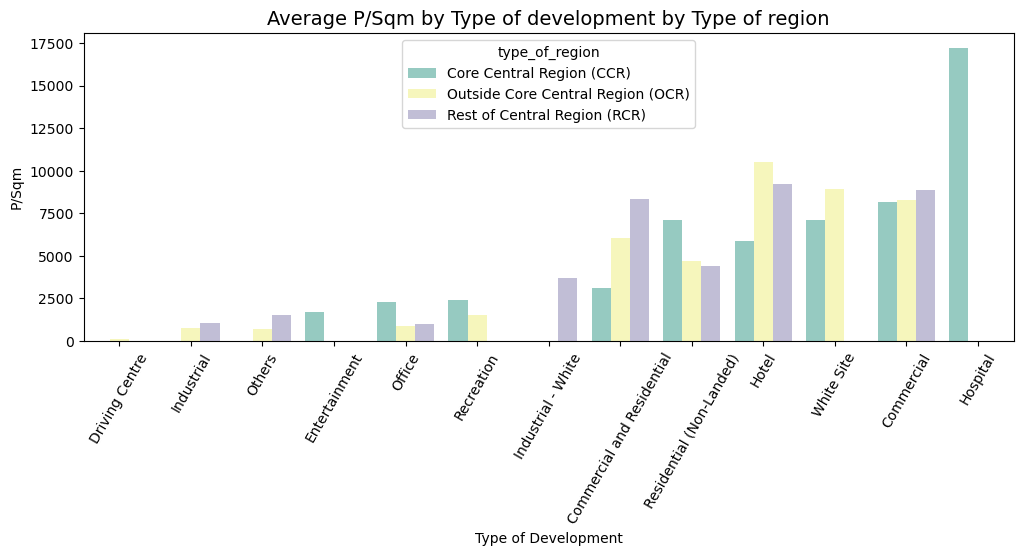

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

URA_Data = pd.read_csv('Vacant site by URA - additional details.csv')
URA_Data

import re

def clean_and_convert_price(price):
    if isinstance(price, str):
        # Using regular expression to remove commas and other non-numeric characters
        price = re.sub(r'[^\d.]', '', price)
    try:
        return float(price)
    except ValueError:
        return None
    
URA_Data["psm_per_gpr_or_gfa"] = URA_Data["psm_per_gpr_or_gfa"].apply(clean_and_convert_price)
    
average_prices = URA_Data.groupby(["type_of_devt_code", "type_of_region"])["psm_per_gpr_or_gfa"].mean().reset_index()

preferred_order = ["Driving Centre", "Industrial", "Others", "Entertainment", "Office", "Recreation", "Industrial - White", 
                   "Commercial and Residential", "Residential (Non-Landed)", "Hotel", "White Site", "Commercial", "Hospital"]

plt.figure(figsize=(12, 4))
sns.barplot(data=average_prices, x="type_of_devt_code", y="psm_per_gpr_or_gfa", hue="type_of_region", palette="Set3", order=preferred_order)
plt.title('Average P/Sqm by Type of development by Type of region', fontsize=14)
plt.xlabel('Type of Development')
plt.ylabel('P/Sqm')
plt.xticks(rotation=60, fontsize=10)


plt.show()

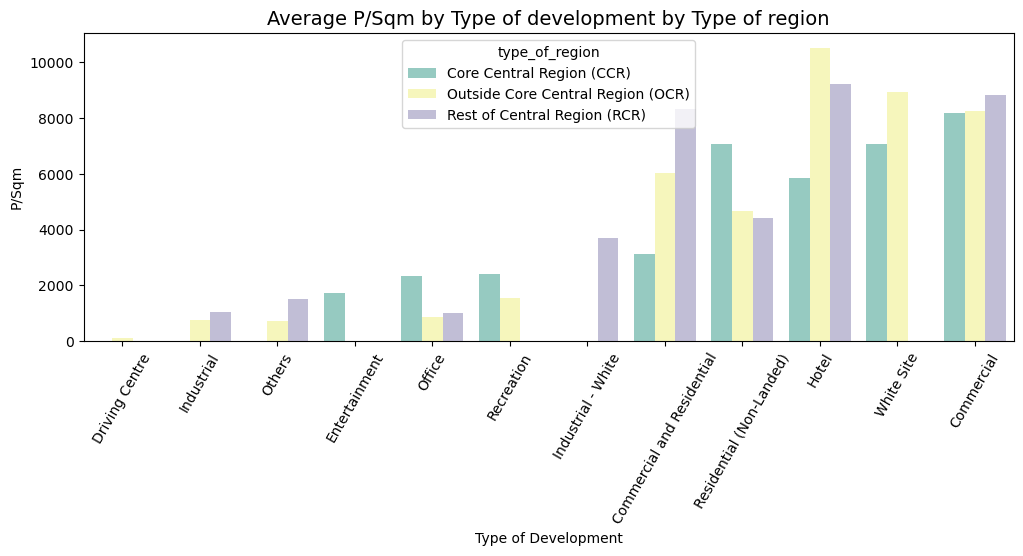

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

URA_Data = pd.read_csv('Vacant site by URA - additional details.csv')
URA_Data

import re

def clean_and_convert_price(price):
    if isinstance(price, str):
        # Using regular expression to remove commas and other non-numeric characters
        price = re.sub(r'[^\d.]', '', price)
    try:
        return float(price)
    except ValueError:
        return None
    
URA_Data["psm_per_gpr_or_gfa"] = URA_Data["psm_per_gpr_or_gfa"].apply(clean_and_convert_price)
    
average_prices = URA_Data.groupby(["type_of_devt_code", "type_of_region"])["psm_per_gpr_or_gfa"].mean().reset_index()

preferred_order = ["Driving Centre", "Industrial", "Others", "Entertainment", "Office", "Recreation", "Industrial - White", 
                   "Commercial and Residential", "Residential (Non-Landed)", "Hotel", "White Site", "Commercial"]

plt.figure(figsize=(12, 4))
sns.barplot(data=average_prices, x="type_of_devt_code", y="psm_per_gpr_or_gfa", hue="type_of_region", palette="Set3", order=preferred_order)
plt.title('Average P/Sqm by Type of development by Type of region', fontsize=14)
plt.xlabel('Type of Development')
plt.ylabel('P/Sqm')
plt.xticks(rotation=60, fontsize=10)


plt.show()

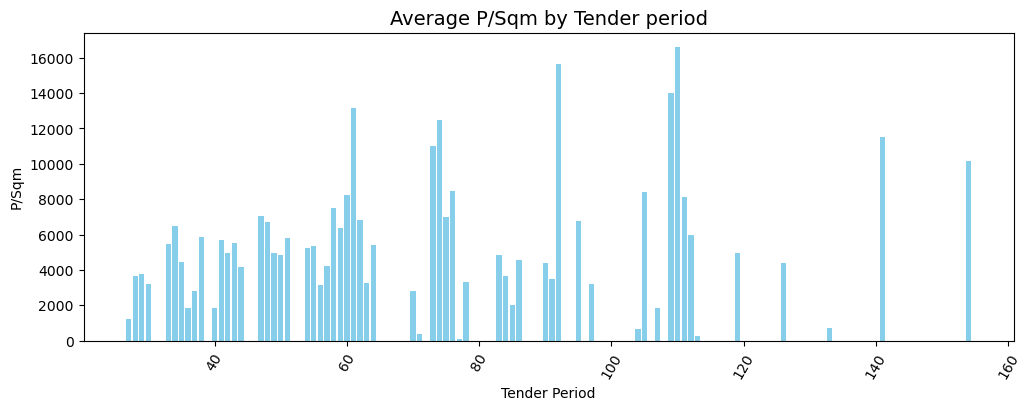

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

URA_Data = pd.read_csv('Vacant site by URA - additional details.csv')

import re

def clean_and_convert_price(price):
    if isinstance(price, str):
        # Using regular expression to remove commas and other non-numeric characters
        price = re.sub(r'[^\d.]', '', price)
    try:
        return float(price)
    except ValueError:
        return None
    
URA_Data["psm_per_gpr_or_gfa"] = URA_Data["psm_per_gpr_or_gfa"].apply(clean_and_convert_price)
    
average_prices = URA_Data.groupby("tender_period (no. of days)")["psm_per_gpr_or_gfa"].mean().reset_index()

average_prices = average_prices.sort_values(by="psm_per_gpr_or_gfa")

plt.figure(figsize=(12, 4))
plt.title('Average P/Sqm by Tender period', fontsize=14)
plt.bar(average_prices["tender_period (no. of days)"], average_prices["psm_per_gpr_or_gfa"], color='skyblue')
plt.xlabel('Tender Period')
plt.ylabel('P/Sqm')
plt.xticks(rotation=60, fontsize=10)


plt.show()

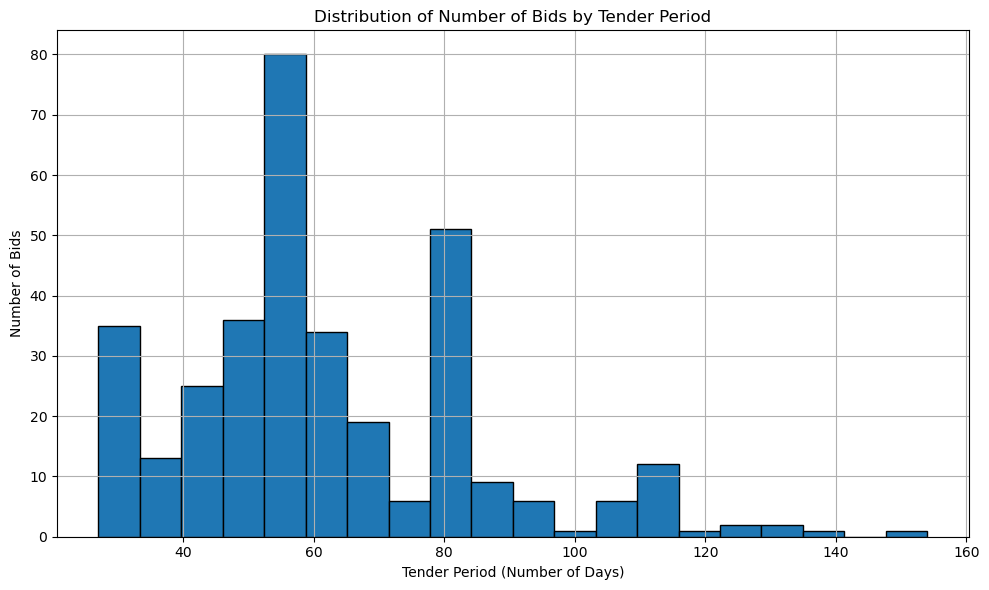

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data with the "tender_period" and "no_of_bids" columns
URA_Data = pd.read_csv("Vacant site by URA - additional details.csv")

# Verify that the "tender_period" column exists in the dataset

# Create a histogram to visualize the distribution of "tender_period"
plt.figure(figsize=(10, 6))
plt.hist(URA_Data["tender_period (no. of days)"], bins=20, edgecolor='k')
plt.xlabel("Tender Period (Number of Days)")
plt.ylabel("Number of Bids")
plt.title("Distribution of Number of Bids by Tender Period")
plt.grid(True)

# Display the histogram
plt.tight_layout()
plt.show()

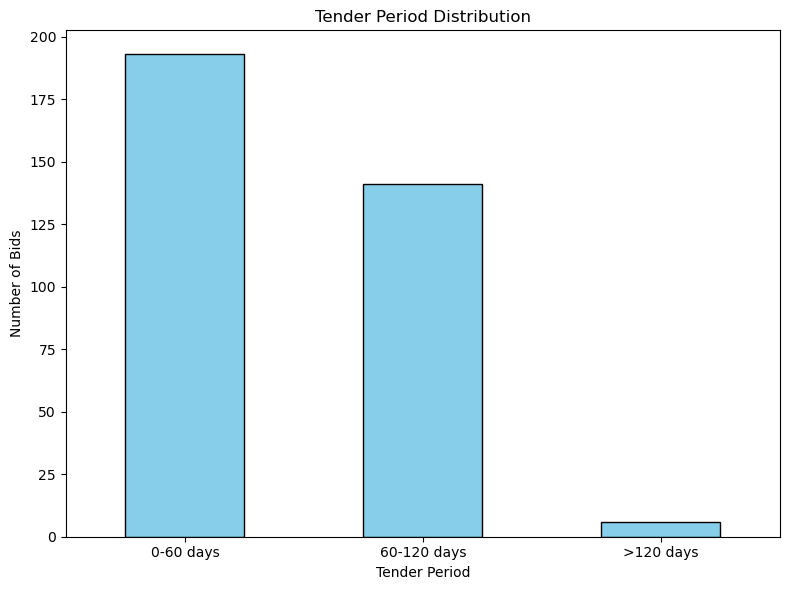

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data with the "tender_period" column
URA_Data = pd.read_csv("Vacant site by URA - additional details.csv")

# Verify that the "tender_period" column exists in the dataset

# Define the bin edges for grouping the "tender_period" data
bin_edges = [0, 60, 120, float('inf')]
bin_labels = ["0-60 days", "60-120 days", ">120 days"]

# Group the "tender_period" data into bins
URA_Data["tender_period_bin"] = pd.cut(URA_Data["tender_period (no. of days)"], bins=bin_edges, labels=bin_labels, right=False)

# Calculate the count of each bin
bin_counts = URA_Data["tender_period_bin"].value_counts()

# Create a bar chart to visualize the grouping of "tender_period" data
plt.figure(figsize=(8, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='k')
plt.xlabel("Tender Period")
plt.ylabel("Number of Bids")
plt.title("Tender Period Distribution")
plt.xticks(rotation=0)

# Display the bar chart
plt.tight_layout()
plt.show()


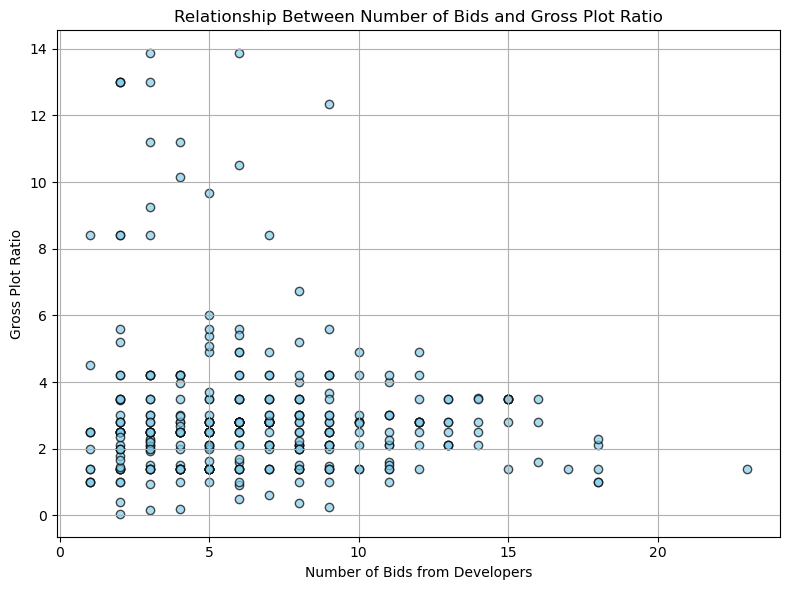

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

URA_Data = pd.read_csv("Vacant site by URA - additional details.csv")

plt.figure(figsize=(8, 6))
plt.scatter(URA_Data["no_of_bids"], URA_Data["gross_plot_ratio"], c='skyblue', edgecolors='k', alpha=0.7)
plt.xlabel("Number of Bids from Developers")
plt.ylabel("Gross Plot Ratio")
plt.title("Relationship Between Number of Bids and Gross Plot Ratio")
plt.grid(True)


plt.tight_layout()
plt.show()

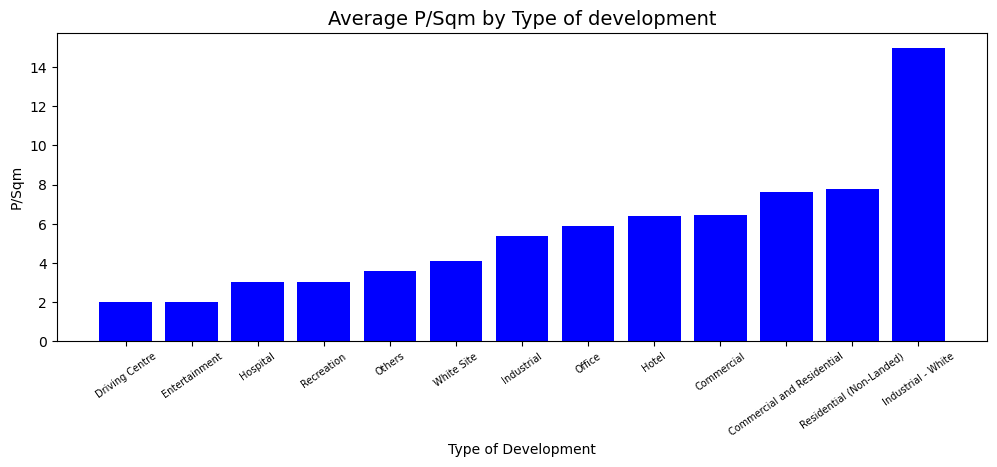

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

URA_Data = pd.read_csv("Vacant site by URA - additional details.csv")

import re
    
average_prices = URA_Data.groupby("type_of_devt_code")["no_of_bids"].mean().reset_index()

average_prices = average_prices.sort_values(by="no_of_bids")

plt.figure(figsize=(12, 4))
plt.title('Average P/Sqm by Type of development', fontsize=14)
plt.bar(average_prices["type_of_devt_code"], average_prices["no_of_bids"], color='blue')
plt.xlabel('Type of Development')
plt.ylabel('P/Sqm')
plt.xticks(rotation=35, fontsize=7)


plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


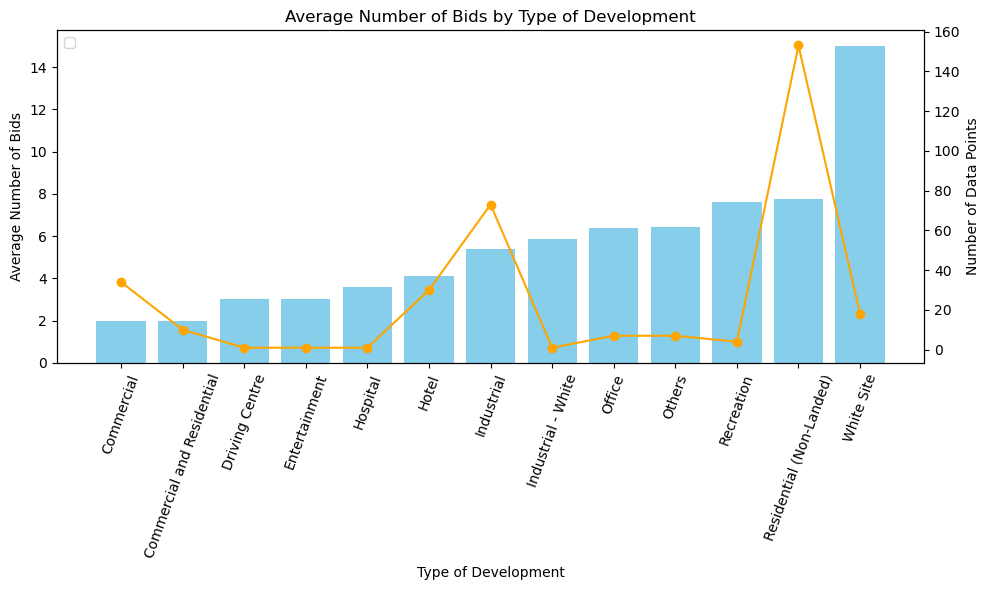

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

URA_Data = pd.read_csv("Vacant site by URA - additional details.csv")

grouped_data_avg = URA_Data.groupby("type_of_devt_code")["no_of_bids"].mean().reset_index()

grouped_data_avg = grouped_data_avg.sort_values(by="no_of_bids")

grouped_data = grouped_data.sort_values(by="no_of_bids")

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(grouped_data_avg["type_of_devt_code"], grouped_data_avg["no_of_bids"], color='skyblue')
ax1.set_xlabel("Type of Development")
ax1.set_ylabel("Average Number of Bids")
ax1.set_title("Average Number of Bids by Type of Development")
ax1.tick_params(axis='x', rotation=70)

grouped_data_count = URA_Data.groupby("type_of_devt_code")["no_of_bids"].count().reset_index()

ax2 = ax1.twinx()
ax2.plot(grouped_data_count["type_of_devt_code"], grouped_data_count["no_of_bids"], color='orange', marker='o', linestyle='-')
ax2.set_ylabel("Number of Data Points")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2

legend = ax1.legend(handles=handles, labels=labels, loc="upper left")


plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data with the relevant columns
URA_Data = pd.read_csv("Vacant site by URA - additional details.csv")

# Verify that the columns exist in the dataset

# Group the data by "type_of_devt_code" and "type_of_region" and calculate the count of data points
grouped_data_count = URA_Data.groupby(["type_of_devt_code", "type_of_region"]).size().unstack(fill_value=0)

# Calculate the percentage of each type of region within each type of development
grouped_data_percentage = grouped_data_count.div(grouped_data_count.sum(axis=1), axis=0) * 100

# Group the data by "type_of_devt_code" and calculate the average of "psm_per_gpr_or_gfa"
grouped_data_avg_psm = URA_Data.groupby("type_of_devt_code")["psm_per_gpr_or_gfa"].mean()

# Create a stacked column chart for the proportion of type of region
fig, ax1 = plt.subplots(figsize=(12, 6))
grouped_data_percentage.plot(kind='bar', stacked=True, ax=ax1, colormap='viridis')
ax1.set_xlabel("Type of Development")
ax1.set_ylabel("% of Type of Development")
ax1.set_title("Proportion of Type of Region by Type of Development")
ax1.tick_params(axis='x', rotation=45)

# Grouped data is transformed for the line graph on the secondary axis
grouped_data_avg_psm.plot(secondary_y=True, ax=ax1, color='orange', marker='o', linestyle='-')

# Set labels for the axes
ax1.set_ylabel("% of Type of Development")
ax1.right_ax.set_ylabel("Average P/Sqm")
ax1.set_xlabel("Type of Development")

# Create a legend for the chart
ax1.get_legend().remove()
ax1.lines[0].set_label("% of Type of Development")
ax1.right_ax.lines[0].set_label("Average P/Sqm")
ax1.legend(loc='upper left')

# Display the chart
plt.tight_layout()
plt.show()


TypeError: Could not convert 10,145.659,755.1811,974.1810,858.993,789.608,667.739,494.119,387.854,961.4010,129.1710,991.6711,502.578,163.2716,580.0015,661.0011,682.6210,976.254,124.446,996.597,256.136,048.714,773.686,027.009,707.057,947.9211,880.876,273.549,568.083,372.125,414.633,740.983,625.837,283.091,428.57 to numeric

C:\Users\user\AppData\Local\Temp\ipykernel_31388\618534506.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(development_order, rotation=35, fontsize=8)
C:\Users\user\AppData\Local\Temp\ipykernel_31388\618534506.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()])  # Format y-axis labels as percentages


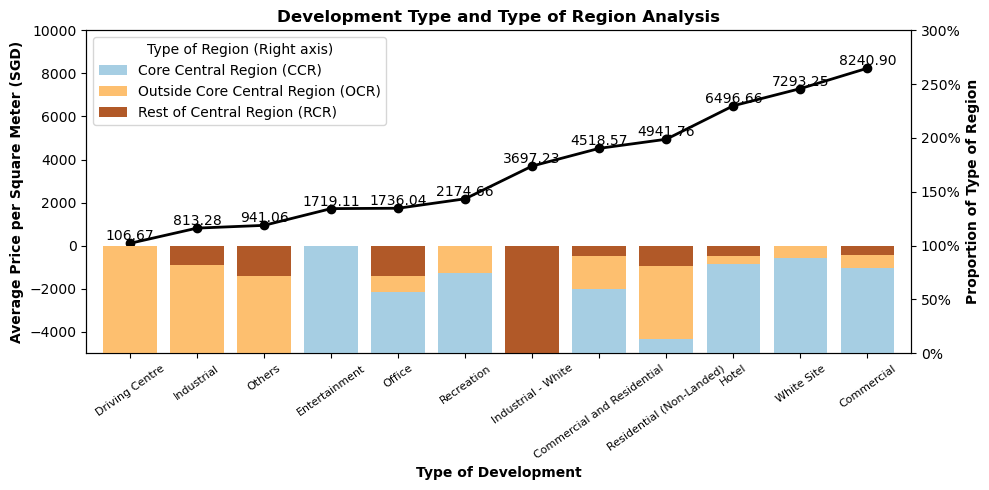

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
URA_Data = pd.read_csv("Vacant site by URA - additional details.csv")

# Define the order of development types
development_order = [
    "Driving Centre", "Industrial", "Others", "Entertainment", 
    "Office", "Recreation", "Industrial - White", 
    "Commercial and Residential", "Residential (Non-Landed)", 
    "Hotel", "White Site", "Commercial",
]

URA_Data['type_of_devt_code'] = pd.Categorical(URA_Data['type_of_devt_code'], categories=development_order, ordered=True)
URA_Data = URA_Data.sort_values('type_of_devt_code')

import re

def clean_and_convert_price(price):
    if isinstance(price, str):
        # Using regular expression to remove commas and other non-numeric characters
        price = re.sub(r'[^\d.]', '', price)
    try:
        return float(price)
    except ValueError:
        return None
    
URA_Data["psm_per_gpr_or_gfa"] = URA_Data["psm_per_gpr_or_gfa"].apply(clean_and_convert_price)


# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Calculate the average price per square meter by type of development
average_price_per_sqm = URA_Data.groupby('type_of_devt_code')['psm_per_gpr_or_gfa'].mean()

# Create a line plot on the primary y-axis
ax1.plot(development_order, average_price_per_sqm, 
         color='black', linewidth=2, marker='o', zorder=2)  # Move the line plot to the front

# Set the x-axis labels with rotation
ax1.set_xticklabels(development_order, rotation=35, fontsize=8)
ax1.set_xlabel('Type of Development', fontweight="bold")
ax1.set_ylabel('Average Price per Square Meter (SGD)', color='black', fontweight="bold")
ax1.set_ylim(-5000, 10000)

for x, y in zip(development_order, average_price_per_sqm):
    ax1.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Create a secondary y-axis for the stacked bar charts
ax2 = ax1.twinx()

# Calculate the proportion of type_of_region for each type_of_devt_code
region_proportions = URA_Data.pivot_table(index='type_of_devt_code', columns='type_of_region', 
                                      values='psm_per_gpr_or_gfa', aggfunc='count').div(URA_Data.groupby('type_of_devt_code')['psm_per_gpr_or_gfa'].count(), axis=0)
region_proportions = region_proportions.reindex(development_order)

# Plot stacked bar charts on the secondary y-axis
region_proportions.plot(kind='bar', stacked=True, ax=ax2, colormap='Paired', width=0.8)

# Set the secondary y-axis limits between 0 and 2.5 (for percentage)
ax2.set_ylim(0, 3)
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()])  # Format y-axis labels as percentages
ax2.set_ylabel('Proportion of Type of Region', fontweight="bold")

# Add legend for the secondary y-axis
ax2.legend(loc='upper left', title='Type of Region (Right axis)')

# Display the plot
plt.title('Development Type and Type of Region Analysis', fontweight="bold")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

URA_Data = pd.read_csv("Vacant site by URA - additional details.csv")

import re

def clean_and_convert_price(price):
    if isinstance(price, str):
        # Using regular expression to remove commas and other non-numeric characters
        price = re.sub(r'[^\d.]', '', price)
    try:
        return float(price)
    except ValueError:
        return None
    
URA_Data["no_of_bids"] = URA_Data["no_of_bids"].apply(clean_and_convert_price)